# Import Dependencies

In [1]:
#importar las dependencias
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar la ruta de archivo PIB
gdp_data_to_load = "../Resources/GDP.csv"

# Cargar la ruta de catalogo paises
onu_data_to_load = "../Resources/ONU.csv"

# Establece el archivo de Salida
file_name = "../Resources/PIB.csv"

# Read information

In [2]:
# Lee los archivos y almacenarlos en un dataframe
df_gdp_data = pd.read_csv(gdp_data_to_load)
df_onu_data = pd.read_csv(onu_data_to_load)

# Clean Data

In [3]:
# Los datos fueron obtenidos desde el banco mundial:
# http://datatopics.worldbank.org/world-development-indicators/themes/economy.html

# Se renombran las columnas para generar una subnet
df_gdp_data.rename(columns={'Country Name':'Country'}, inplace=True)

In [4]:
#Se obtienen las diferencias entre los diferentes paises
diferencia = set(pd.unique(df_onu_data["Country"]).tolist()) - set(pd.unique(df_gdp_data["Country"]).tolist()) 

In [5]:
#Se limpia la informacion de acuerdo a las diferencias
# Se limpia el dataframe de la ONU
df_onu_data['Country'] = df_onu_data['Country'].str.lower() 
df_onu_data['Country'] = df_onu_data['Country'].str.replace(r"\s+\(.*\)","")
df_onu_data['Country'] = df_onu_data['Country'].str.replace(r"\s+\[.*\]","")
df_onu_data['Country'] = df_onu_data['Country'].str.replace(r"\[.*\]","")

# Se limpia el dataframe de el PIB
df_gdp_data['Country'] = df_gdp_data['Country'].str.lower() 
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("bahamas, the","bahamas")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("cabo verde","cape verde")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("congo, rep.","congo")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("cote d'ivoire","côte d’ivoire")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("congo, dem. rep.","democratic republic of the congo")

df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("korea, rep.","republic of korea")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("korea, dem. people’s rep.","democratic people’s republic of korea")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("egypt, arab rep.","egypt")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("gambia, the","gambia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("iran, islamic rep.","iran")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("lao pdr","lao people’s democratic republic")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("macedonia, fyr","the former yugoslav republic of macedonia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("micronesia, fed. sts.","micronesia")

df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("moldova","republic of moldova")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("syrian arab republic","syria")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("slovak republic","slovakia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("st. vincent and the grenadines","saint vincent and the grenadines")

df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("st. lucia","saint lucia")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("st. kitts and nevis","saint kitts and nevis")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("tanzania","united of republic of tanzania")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("timor-leste","timor leste")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("vietnam","viet nam")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("venezuela, rb","venezuela")
df_gdp_data['Country'] = df_gdp_data['Country'].str.replace("yemen, rep.","yemen")

In [6]:
#Se vuelve a validar las diferencias en los paises
diferencia = set(pd.unique(df_onu_data["Country"]).tolist()) - set(pd.unique(df_gdp_data["Country"]).tolist()) 
print(sorted(diferencia))

['kyrgyzstan', 'swaziland']


# Shift Data

In [7]:
# Se quitan las ultimas columnas para que coincidan con los años
df_gdp_data.drop(df_gdp_data.columns[[-1, -2, -3, -4, -5, -6]], axis=1, inplace=True)
df_gdp_data.set_index("Country")

# Se agrupa el data frame del PIB para tener la misma estructura que el de la ONU
df_pib = pd.wide_to_long(df_gdp_data, ["PIB"], i="Country", j="Year")
df_pib.head(5)

,,Country Code,Indicator Name,Indicator Code,PIB
Country,Year,,,,
aruba,1960,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
afghanistan,1960,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
angola,1960,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
albania,1960,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
andorra,1960,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN


In [8]:
# Se resetea el indice del nuevo dataframe
df_pib = df_pib.reset_index()

In [9]:
# Se exporta la información del PIB
df_pib.to_csv(file_name, encoding='utf-8', index=False)
df_pib.head(5)

,Country,Year,Country Code,Indicator Name,Indicator Code,PIB
0,aruba,1960,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
1,afghanistan,1960,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
2,angola,1960,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
3,albania,1960,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN
4,andorra,1960,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN


In [12]:
year = input ("Please select year you'd like to analyze PIB: ").lower()
df_top_country_pib = df_pib[df_pib['Year'] == int(year)]
df_top_country_pib = df_top_country_pib.sort_values(by=['PIB'], ascending=False)
df_top_country_pib.head(5)

Please select year you'd like to analyze PIB: 2000


,Country,Year,Country Code,Indicator Name,Indicator Code,PIB
10646,equatorial guinea,2000,GNQ,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,18.213780
10605,cape verde,2000,CPV,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,14.284869
10718,myanmar,2000,MMR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,13.745931
10584,belize,2000,BLZ,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,13.019577
10573,azerbaijan,2000,AZE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,11.099999


# Showing information about PIB 

Please type the country you would like to analyze: mexico


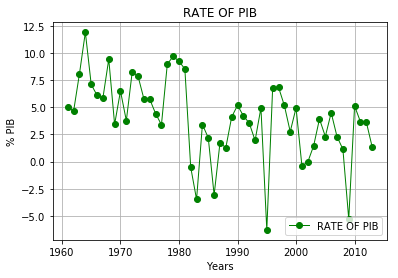

In [13]:
country = input ("Please type the country you would like to analyze: ").lower()
country_plt = df_pib[df_pib['Country'] == country]
plt.plot(country_plt['Year'], country_plt['PIB'], marker ='o', color='g', label="RATE OF PIB",
         linestyle='solid', linewidth=1, markersize=6 )
plt.legend(loc="lower right")
plt.title("RATE OF PIB")
plt.xlabel("Years")
plt.ylabel("% PIB")
plt.grid(True)
plt.show()